In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv("../Datasets/WeightsAndHeights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


Text(0, 0.5, 'total in number')

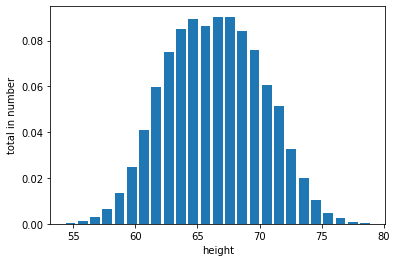

In [23]:
plt.hist(df.height,bins=25,rwidth=0.8,density=True)
plt.xlabel("height")
plt.ylabel("total in number")

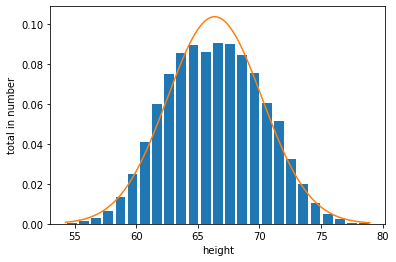

In [24]:
from scipy.stats import norm

plt.hist(df.height,bins=25,rwidth=0.8,density=True)
plt.xlabel("height")
plt.ylabel("total in number")

rng = np.arange(df.height.min(), df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(), df.height.std()))

In [25]:
## the upper limit is 3 standard deviation to right of mean (centre)
## the lower limit is 3 standard deviation to left to mean (centre)

mean = df.height.mean()
std = df.height.std()

upper_limit = mean + 3*std
lower_limit = mean - 3*std

## lets see the outliers
df[(df.height < lower_limit) | (df.height > upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [26]:
## dataset after removing outliers

df = df[(df.height > lower_limit) & (df.height < upper_limit)]
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


## Z-Score
We can do the same using Z Score.

Those who are after 3rd std deviation, in simple terms: after upper and lower limit, they are outliers.


Upper limit is 3rd std deviation to right.


Lower limit is 3rd std deviation to left


In [27]:
df = pd.read_csv("WeightsAndHeights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [28]:
df['Z_score'] = (df.height - df.height.mean()) / (df.height.std())

df.head()

,gender,height,Z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [32]:
## so lets see the outliers
## z>3 and z<-3

df[(df.Z_score > 3) | (df.Z_score < -3)]

,gender,height,Z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [34]:
## lets remove the outliers

df = df[(df.Z_score < 3) & (df.Z_score > -3)]
df.head()

,gender,height,Z_score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [36]:
df.shape

(9993, 3)